In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst
import seaborn as sns
import statistics

In [2]:
sns.set()

In [3]:
h = pd.read_csv("JPY.csv").Close
print(h.iloc[294])
print(h.iloc[295])
print(h.iloc[296])
#print(h[h.isnull()])
h.iloc[295] = np.mean([h.iloc[294],h.iloc[296]]) 
print(h.iloc[294])
print(h.iloc[295])
print(h.iloc[296])

110.07
nan
110.221001
110.07
110.1455005
110.221001


In [5]:
hao = pd.read_csv("JPY.csv").Close
mate = pd.read_csv("AUD.csv").Close

In [6]:
len(hao)

1305

In [7]:
daty = pd.read_csv("JPY.csv").Date

In [8]:
hao.iloc[295] = np.mean([hao.iloc[294], hao.iloc[296]])
mate.iloc[295] = np.mean([mate.iloc[294], mate.iloc[296]])

In [9]:
from datetime import datetime

In [10]:
daty

0       2018-04-04
1       2018-04-05
2       2018-04-06
3       2018-04-09
4       2018-04-10
           ...    
1300    2023-03-29
1301    2023-03-30
1302    2023-03-31
1303    2023-04-03
1304    2023-04-04
Name: Date, Length: 1305, dtype: object

In [11]:
aa = [datetime.strptime(d, '%Y-%m-%d').date() for d in daty]
aa

[datetime.date(2018, 4, 4),
 datetime.date(2018, 4, 5),
 datetime.date(2018, 4, 6),
 datetime.date(2018, 4, 9),
 datetime.date(2018, 4, 10),
 datetime.date(2018, 4, 11),
 datetime.date(2018, 4, 12),
 datetime.date(2018, 4, 13),
 datetime.date(2018, 4, 16),
 datetime.date(2018, 4, 17),
 datetime.date(2018, 4, 18),
 datetime.date(2018, 4, 19),
 datetime.date(2018, 4, 20),
 datetime.date(2018, 4, 23),
 datetime.date(2018, 4, 24),
 datetime.date(2018, 4, 25),
 datetime.date(2018, 4, 26),
 datetime.date(2018, 4, 27),
 datetime.date(2018, 4, 30),
 datetime.date(2018, 5, 1),
 datetime.date(2018, 5, 2),
 datetime.date(2018, 5, 3),
 datetime.date(2018, 5, 4),
 datetime.date(2018, 5, 7),
 datetime.date(2018, 5, 8),
 datetime.date(2018, 5, 9),
 datetime.date(2018, 5, 10),
 datetime.date(2018, 5, 11),
 datetime.date(2018, 5, 14),
 datetime.date(2018, 5, 15),
 datetime.date(2018, 5, 16),
 datetime.date(2018, 5, 17),
 datetime.date(2018, 5, 18),
 datetime.date(2018, 5, 21),
 datetime.date(2018, 5, 2

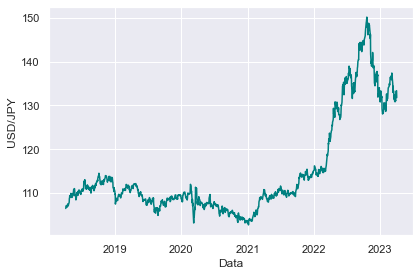

In [12]:
plt.plot(aa, hao, color="teal")
plt.xlabel("Data")
plt.ylabel("USD/JPY")
plt.tight_layout()
plt.savefig("jpy.png")

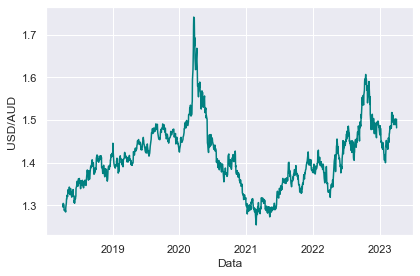

In [13]:
plt.plot(aa, mate, color="teal")
plt.xlabel("Data")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("aud.png")

In [14]:
print(hao[hao.isnull()])
print(mate[mate.isnull()])

Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64)


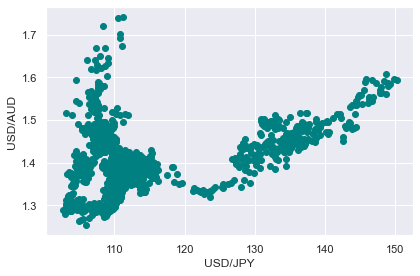

In [15]:
plt.scatter(hao, mate, color="teal")
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("jpyaud.png")

----------
## STACJONARNOŚĆ

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(mate)

(-2.42730558458061,
 0.13417743875120114,
 0,
 1304,
 {'1%': -3.435374708138995,
  '5%': -2.863758995766637,
  '10%': -2.5679514065499265},
 -8269.623830735702)

In [18]:
adfuller(hao)

(-0.5806829316285894,
 0.8752874251925542,
 0,
 1304,
 {'1%': -3.435374708138995,
  '5%': -2.863758995766637,
  '10%': -2.5679514065499265},
 2465.59433901006)

In [19]:
from scipy.stats import pearsonr

In [20]:
corr, _ = pearsonr(hao, mate)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.377


In [21]:
plt.plot(aa[:-1], mate1, color="teal")
plt.xlabel("Data")
plt.ylabel("Zmiany USD/AUD [%]")
plt.tight_layout()
plt.savefig("AUD.png")

NameError: name 'mate1' is not defined

In [22]:
plt.plot(aa[:-1], hao1, color="teal")
plt.xlabel("Data")
plt.ylabel("Zmiany USD/JPY [%]")
plt.tight_layout()
plt.savefig("JPY.png")

NameError: name 'hao1' is not defined

(-36.15456750485206, 0.0, 0, 1303, {'1%': -3.435378572037035, '5%': -2.863760700696655, '10%': -2.56795231450063}, 1934.2341230645784)
(-35.26854788195442, 0.0, 0, 1303, {'1%': -3.435378572037035, '5%': -2.863760700696655, '10%': -2.56795231450063}, 2576.5732525170934)


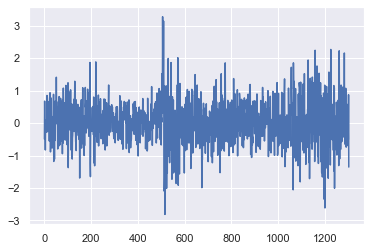

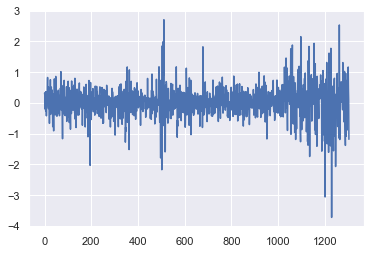

In [23]:
hao1 = np.diff(hao)/hao[:-1]*100
mate1 = np.diff(mate)/mate[:-1]*100
print(adfuller(hao1))
print(adfuller(mate1))
plt.plot(mate1)
plt.show()
plt.plot(hao1)

In [24]:
print(np.var(hao1))
print(np.var(mate1))

0.261749320545567
0.4327868557891534


In [25]:
#d = pd.Series(hao1).pct_change()
#plt.plot(d)

In [26]:
from scipy import stats
stats.median_abs_deviation(hao1)

0.24982997174721563

------------- 
## Rozkład hao1

In [27]:
print(np.mean(hao1))
print(np.var(hao1))

0.017683698574565847
0.261749320545567


In [28]:
from scipy.stats import logistic
m = np.mean(hao1)
s = np.std(hao1)/np.pi*np.sqrt(3)

from scipy.stats import t
from scipy.stats import hypsecant
from scipy.stats import laplace

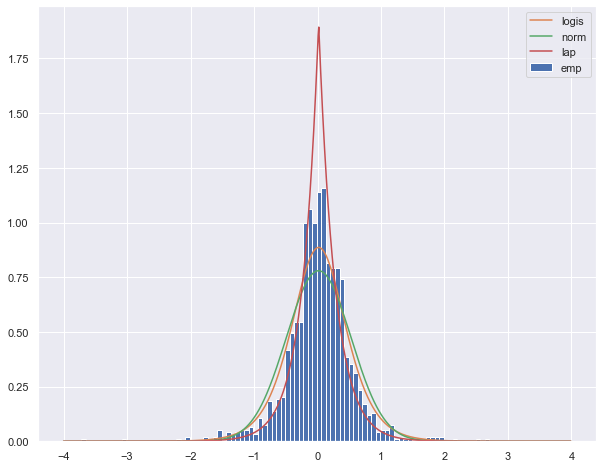

In [29]:
plt.figure(figsize=(10,8))

plt.hist(hao1, bins=90, density = True, label="emp")
xs = np.arange(-4,4,0.01)
y = [logistic.pdf(x, loc=m, scale = s) for x in xs]
y2 = [norm.pdf(x, loc=np.mean(hao1), scale = np.std(hao1)) for x in xs]
y3 = [laplace.pdf(x, loc=np.mean(hao1), scale = np.var(hao1)) for x in xs]
plt.plot(xs,y, label="logis")
plt.plot(xs,y2, label="norm")
plt.plot(xs,y3, label="lap")
plt.legend()
plt.show()

Anderson statistic: 1.0126347381828964

Critical value table
  Significance  Critical value
       0.5000        0.394629
       0.7500        0.566364
       0.8000        0.621810
       0.8500        0.693523
       0.9000        0.798185
       0.9500        0.981762
       0.9750        1.179514
       0.9900        1.443974
       0.9950        1.652188
       0.9975        1.856055
       0.9990        2.140957


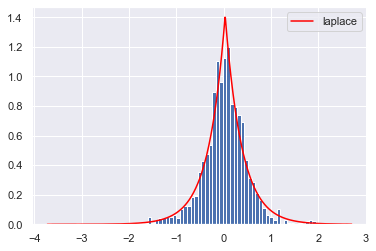

1.0126347381828964

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sst
import json
import pandas as pd

"""
This Anderson-Darling test for Laplacian distribution assumes that 
we do not know the location and scale parameters of the original distribution.
Null hypothesis: The sample data is drawn from a Laplacian distribution.
If result Anderson Statistic is larger than the critical value, 
the null hypothesis is rejected at the corresponding significance level.
Source for critical values:
https://www.tandfonline.com/doi/pdf/10.1081/SAC-9687287
Example code is at the bottom. Simply run the whole file to run example code
"""

def laplace_ad_test(data):
    data = np.array(data)
    loc = np.median(data)
    n = data.shape[0]
    scale = np.sum(np.abs(data-loc))/n

    z_i = np.zeros_like(data)

    for i, d in enumerate(data):
        if d < loc:
            z_i[i] = np.exp((d-loc)/scale)/2
        else:
            z_i[i] = 1 - np.exp((-d+loc)/scale)/2


    rank = np.arange(1, n+1)
    z_i = np.sort(z_i)
    rev_z_i = np.flip(z_i)
    s = (2*rank-1)/n
    s *= (np.log(z_i)+np.log(1-rev_z_i))
    s = np.sum(s)
    A_sq = -n-s

    print("Anderson statistic: {}\n".format(A_sq))
    fetch_crit_value(n)

    x = np.linspace(np.min(data), np.max(data), 1000)
    pdf = np.exp(-abs(x-loc)/scale)/(2.*scale)
    plt.plot(x, pdf, color='red', label='laplace')
    plt.hist(data, bins=85, density=True)
    plt.legend()
    plt.show()

    return A_sq


def fetch_crit_value(n):
    if n%2 == 1:
        table = np.array([[0.5,     -0.928269,  0.2916],
                          [0.75,    -0.569497,  0.2637],
                          [0.8,     -0.477586,  0.2636],
                          [0.85,    -0.367685,  0.2600],
                          [0.9,     -0.227272,  0.2525],
                          [0.95,    -0.017972,  0.2053],
                          [0.975,   0.163424,   -0.0755],
                          [0.990,   0.365898,   -0.2964],
                          [0.995,   0.503329,   -0.6978],
                          [0.9975,  0.623224,   -0.8344],
                          [0.999,   0.760512,   -1.0847]])
    else:
        table = np.array([[0.5,     -0.932288,  3.2310],
                          [0.75,    -0.571021,  3.2644],
                          [0.8,     -0.477644,  3.2895],
                          [0.85,    -0.368555,  3.3703],
                          [0.9,     -0.228027,  3.4067],
                          [0.95,    -0.018564,  0.2053],
                          [0.975,   0.162622,   3.2346],
                          [0.990,   0.365076,   3.0296],
                          [0.995,   0.500015,   2.7197],
                          [0.9975,  0.616555,   2.4751],
                          [0.999,   0.759613,   2.1387]])

    crit_val = {'Significance':[], 'Critical value':[]}
    for row in table:
        crit_val['Significance'].append(row[0])
        crit_val['Critical value'].append(np.exp(row[1]+row[2]/n))

    crit_val = pd.DataFrame.from_dict(crit_val)
    print("Critical value table\n", crit_val.to_string(index=False))


# Example run ###

data = hao1
laplace_ad_test(data)


##If result Anderson Statistic is larger than the critical value, 
##the null hypothesis is rejected at the corresponding significance level.
#################

In [31]:
stats.ttest_1samp(hao1, popmean=m)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

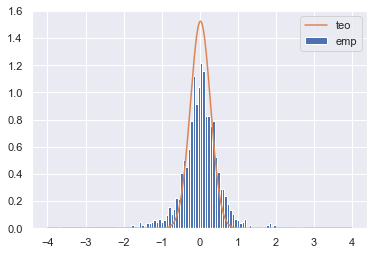

In [32]:
plt.hist(hao1, bins=100, density = True, label="emp")
xs = np.arange(-4,4,0.01)
y = [norm.pdf(x, loc=np.mean(hao1), scale = np.var(hao1)) for x in xs]
plt.plot(xs,y, label="teo")
plt.legend()
plt.show()

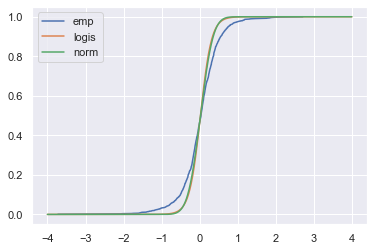

In [33]:
m = np.mean(hao1)
s = np.var(hao1)/np.pi*np.sqrt(3)

x1,y1 = dcst.ecdf(hao1)
plt.plot(x1,y1, label="emp")
xs = np.arange(-4,4,0.01)
y = [logistic.cdf(x, loc=m, scale = s) for x in xs]
y2 = [norm.cdf(x, loc=np.mean(hao1), scale = np.var(hao1)) for x in xs]
plt.plot(xs,y, label="logis")
plt.plot(xs,y2, label="norm")
plt.legend()
plt.show()

zmienna ryzyka, co jest zagrożeniem (spadek czy wzrost), liczymy parametry statystyczne i doprowadzamy do stacjoarnosci,
procentowe zmiany

---------------
# PORTFEL

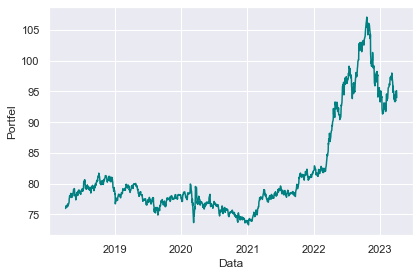

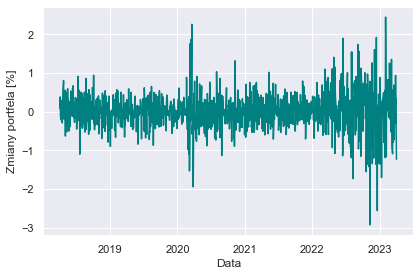

In [42]:
plt.plot(aa, data, color="teal")
plt.xlabel("Data")
plt.ylabel("Portfel")
plt.tight_layout()
plt.savefig("portfel.png")
plt.show()

plt.plot(aa[:-1], data1, color="teal")
plt.xlabel("Data")
plt.ylabel("Zmiany portfela [%]")
plt.tight_layout()
plt.savefig("pportfel.png")

### miary zmiennosci


In [43]:
import statistics

In [44]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

In [45]:
### ODCHYLENIE STANDARDOWE
COV = covariance(hao1, mate1)
w1 = 0.71
w2=0.29
s = np.sqrt(np.var(hao1)*w1**2 + np.var(mate1)*w2**2 + 2*w1*w2*COV)
s

0.4578745472582482

In [46]:
def v(data):
    return sum([(x-np.mean(data))**2 for x in data])/(len(data)-1)

In [47]:
np.sqrt(v(hao1)*w1**2 + v(mate1)*w2**2 + 2*w1*w2*COV)

0.4580156102039098

In [48]:
statistics.stdev(data1)

0.4580156102039098

In [49]:
np.std(data1, ddof=1) ##z poprawka

0.4580156102039098

In [50]:
print(np.std(data1, ddof=0)) ##bez poprawki
print(np.std(data1)) ##bez poprawki


0.45783995703917413
0.45783995703917413


In [51]:
def miary_zmiennosci(x):
    xx= pd.DataFrame(x)
    #odchylenie standardowe
    stdev = statistics.stdev(x)
    
    #odchylenie przeciętne
    odch_przec = xx.mad().Close
    
    #odchylenie ćwiartkowe
    Q = np.quantile(x, [0.25, 0.75])
    odch_ćw = (Q[1] - Q[0]) / 2
    
    #semiodchylenie std
    semi_std = np.sqrt(np.sum(x[x -np.mean(x)>0] ** 2) / (len(x)-1) )
    
    #semiodchylenie przeciętne
    data = x[x -np.mean(x)>0]
    semi_przec = np.sum(np.abs(x[x -np.mean(x)>0] - np.mean(x))) / (len(x)-1)
    
    data = [['Odchylenie standardowe', stdev], ['Odchylenie przeciętne', odch_przec], ['Odchylenie ćwiartkowe', odch_ćw],
           ['Semiodchylenie standardowe', semi_std], ['Semiodchylenie przeciętne', semi_przec]] 
    df = pd.DataFrame(data, columns=['Miara zmienności', 'Wartość'])
    
    return df

In [52]:
def miary(x = hao1, y=mate1, w1=0.71, w2=0.29):
    data = w1*x + w2*y
    dat = pd.DataFrame(data)
    
    #odchylenie standardowe
    stdev = statistics.stdev(data)
    
    #odchylenie przeciętne
    odch_przec = dat.mad().Close
    
    #odchylenie ćwiartkowe
    Q = np.quantile(data, [0.25, 0.75])
    odch_ćw = (Q[1] - Q[0]) / 2
    
    #semiodchylenie std
    d = data[data -np.mean(data)>0]
    xx = x[data -np.mean(data)>0]
    yy = y[data -np.mean(data)>0]
    semi_std = np.sqrt(np.sum(d ** 2 + 2*covariance(xx,yy)) / (len(data)-1) )
    
    #semiodchylenie przeciętne    
    semi_przec = np.sum(np.abs(d - np.mean(data))) / (len(data)-1)
    
    data = [['Odchylenie standardowe', stdev], ['Odchylenie przeciętne', odch_przec], ['Odchylenie ćwiartkowe', odch_ćw],
           ['Semiodchylenie standardowe', semi_std], ['Semiodchylenie przeciętne', semi_przec]] 
    df = pd.DataFrame(data, columns=['Miara zmienności', 'Wartość'])
    
    return df

In [53]:
data = 0.71*hao + 0.29*mate
data1 = 0.71*hao1 + 0.29*mate1

In [54]:
miary_zmiennosci(mate1)

,Miara zmienności,Wartość
0,Odchylenie standardowe,0.658118
1,Odchylenie przeciętne,0.491863
2,Odchylenie ćwiartkowe,0.374558
3,Semiodchylenie standardowe,0.476425
4,Semiodchylenie przeciętne,0.246120


In [55]:
miary_zmiennosci(hao1)

,Miara zmienności,Wartość
0,Odchylenie standardowe,0.511811
1,Odchylenie przeciętne,0.354812
2,Odchylenie ćwiartkowe,0.248483
3,Semiodchylenie standardowe,0.360147
4,Semiodchylenie przeciętne,0.177542


In [56]:
miary_zmiennosci(data1)

,Miara zmienności,Wartość
0,Odchylenie standardowe,0.458016
1,Odchylenie przeciętne,0.319665
2,Odchylenie ćwiartkowe,0.231842
3,Semiodchylenie standardowe,0.328563
4,Semiodchylenie przeciętne,0.159955


In [57]:
miary()

,Miara zmienności,Wartość
0,Odchylenie standardowe,0.458016
1,Odchylenie przeciętne,0.319665
2,Odchylenie ćwiartkowe,0.231842
3,Semiodchylenie standardowe,0.334682
4,Semiodchylenie przeciętne,0.159955


In [58]:
h = pd.DataFrame(hao1)
h.mad().Close

0.3548123321592887

In [59]:
np.mean(abs((hao1) - np.mean(hao1)))


0.3548123321592887

In [60]:
from statistics import median
median(abs((hao1) - median(hao1)))

0.24982997174721563

In [63]:
from scipy.stats import median_abs_deviation
median_abs_deviation(hao1)

0.24982997174721563

In [64]:
from scipy.stats import median_abs_deviation

numbers = data1

median_absolute_deviation = median_abs_deviation(numbers)
print(median_absolute_deviation)

0.23353143111010388


## kwantyle

In [65]:
d = {"kwantyl" : np.arange(0,1.05,0.05), "portfel" : np.quantile(data, np.arange(0,1.05,0.05)), "stacjonarny_portfel": np.quantile(data1, np.arange(0,1.05,0.05))}
qq = pd.DataFrame(data=d)
qq

,kwantyl,portfel,stacjonarny_portfel
0,0.00,73.274803,-2.931229
1,0.05,74.654749,-0.664215
2,0.10,75.455346,-0.473853
3,0.15,76.220398,-0.369793
4,0.20,76.684243,-0.268526
5,0.25,77.116805,-0.210768
6,0.30,77.522624,-0.153834
7,0.35,77.775903,-0.102101
8,0.40,78.089091,-0.063979
9,0.45,78.338746,-0.015184


---
## dystrybuanta

lightseagreen
teal
darkcyan
gold
lightgreen

In [66]:
np.std(data1, ddof=1)/np.sqrt(2)

0.3238659438644791

In [67]:
np.mean(data1)

0.016058069576311444

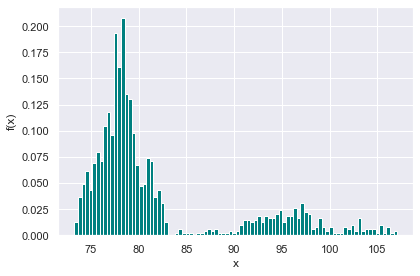

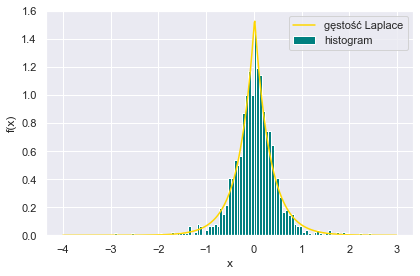

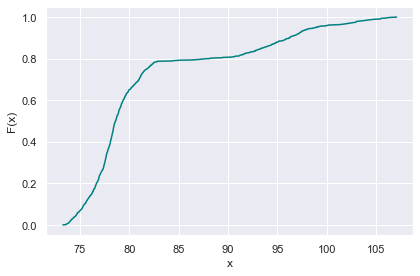

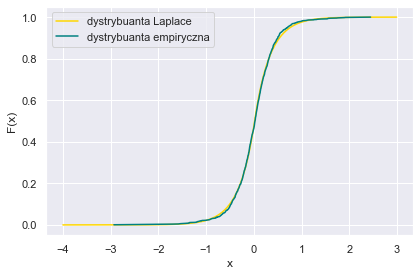

In [68]:
plt.hist(data, bins=90, density = True, color="teal")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tight_layout()
plt.savefig("portfelhist.png")
plt.show()
plt.hist(data1, bins=90, density = True, label="histogram", color="teal")
xs = np.arange(-4,3,0.01)
y = [laplace.pdf(x, loc=np.mean(data1), scale = np.std(data1, ddof=1)/np.sqrt(2)) for x in xs]
plt.plot(xs,y, label="gęstość Laplace", color="gold")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tight_layout()
plt.savefig("portfelhist1.png")
plt.show()


x1,y1 = dcst.ecdf(data)
plt.plot(x1,y1, color="teal")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.tight_layout()
plt.savefig("portfeldystr.png")
plt.show()

x1,y1 = dcst.ecdf(data1)
y2 = [laplace.cdf(x, loc=np.mean(data1), scale = np.std(data1, ddof=1)/np.sqrt(2)) for x in xs]
plt.plot(xs,y2, label="dystrybuanta Laplace", color="gold")
plt.plot(x1,y1, label="dystrybuanta empiryczna", color="teal")
plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)")
plt.tight_layout()
plt.savefig("portfeldystr1.png")

### porównanie z 1.

<ipython-input-69-57bf74867b53>:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kernel = scipy.stats.kde.gaussian_kde(data1)
<ipython-input-69-57bf74867b53>:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kernel = scipy.stats.kde.gaussian_kde(hao1)
<ipython-input-69-57bf74867b53>:9: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  kernel = scipy.stats.kde.gaussian_kde(mate1)


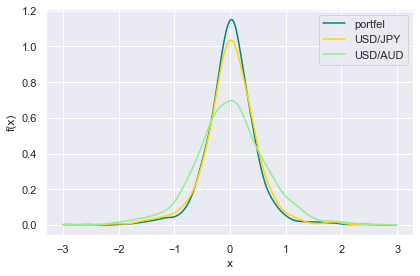

In [69]:
import scipy.stats
x = np.arange(-3, 3, 0.01)
kernel = scipy.stats.kde.gaussian_kde(data1)
y = kernel.evaluate(x)
plt.plot(x,y, label="portfel", color="teal")
kernel = scipy.stats.kde.gaussian_kde(hao1)
y = kernel.evaluate(x)
plt.plot(x,y, label="USD/JPY", color="gold")
kernel = scipy.stats.kde.gaussian_kde(mate1)
y = kernel.evaluate(x)
plt.plot(x,y, label="USD/AUD", color="lightgreen")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tight_layout()
plt.savefig("gestosci.png")
plt.show()

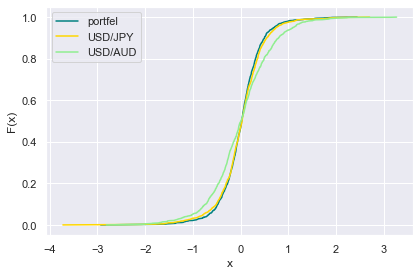

In [70]:
x1,y1 = dcst.ecdf(data1)
x2,y2 = dcst.ecdf(hao1)
x3,y3 = dcst.ecdf(mate1)
plt.plot(x1,y1, label="portfel", color="teal")
plt.plot(x2,y2, label="USD/JPY", color="gold")
plt.plot(x3,y3, label="USD/AUD", color="lightgreen")
plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)")
plt.tight_layout()
plt.savefig("portfeljpy.png")

In [71]:
d = {"Kwantyle" : np.arange(0,1.05,0.05), "USD/JPY" : np.quantile(hao1, np.arange(0,1.05,0.05)),
     "USD/AUD" : np.quantile(mate1, np.arange(0,1.05,0.05)), 
     "Portfel": np.quantile(data1, np.arange(0,1.05,0.05))}
qq = pd.DataFrame(data=d)
c = ["USD/JPY","USD/AUD","Portfel"]
qq['Min_wartość'] = qq[c].min(axis=1)
qq['Max_ryzyko'] = qq[c].idxmin(axis=1)
qq['Min_ryzyko'] = qq[c].idxmax(axis=1)
qq

,Kwantyle,USD/JPY,USD/AUD,Portfel,Min_wartość,Max_ryzyko,Min_ryzyko
0,0.00,-3.724951,-2.812964,-2.931229,-3.724951,USD/JPY,USD/AUD
1,0.05,-0.780778,-1.009341,-0.664215,-1.009341,USD/AUD,Portfel
2,0.10,-0.506833,-0.729749,-0.473853,-0.729749,USD/AUD,Portfel
3,0.15,-0.393704,-0.584234,-0.369793,-0.584234,USD/AUD,Portfel
4,0.20,-0.303227,-0.460543,-0.268526,-0.460543,USD/AUD,Portfel
5,0.25,-0.207620,-0.361869,-0.210768,-0.361869,USD/AUD,USD/JPY
6,0.30,-0.163387,-0.282415,-0.153834,-0.282415,USD/AUD,Portfel
7,0.35,-0.120060,-0.227361,-0.102101,-0.227361,USD/AUD,Portfel
8,0.40,-0.063961,-0.145281,-0.063979,-0.145281,USD/AUD,USD/JPY
9,0.45,-0.016962,-0.061634,-0.015184,-0.061634,USD/AUD,Portfel


In [192]:
## aud - większe ryzyko dużych spadków, 
#ale AUD jest bardziej rozproszone i ma więcej średnio małych spadków - -2 a 0 %
## jpy zanotował najwiekszy spadek
##razem działają git i dystrybuanta ma najszybszy wzrost i najmniejsze ryzyko z nich

----------
## dystrybuanta dwuwymiarowa

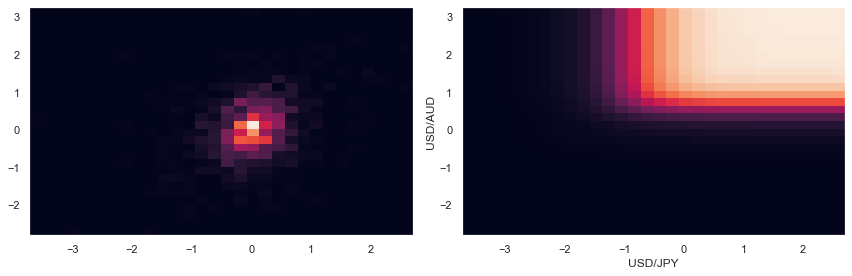

In [91]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
hist_vals, xbins, ybins, mesh = ax1.hist2d(hao1, mate1, bins=30, density=True)
ax2.pcolormesh(xbins, ybins, hist_vals.cumsum(axis=0).cumsum(axis=1))
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("dystr1.png")
plt.show() ##dystrybuanta
plt.show()

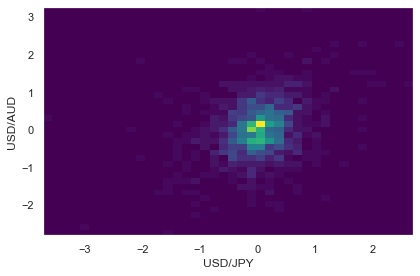

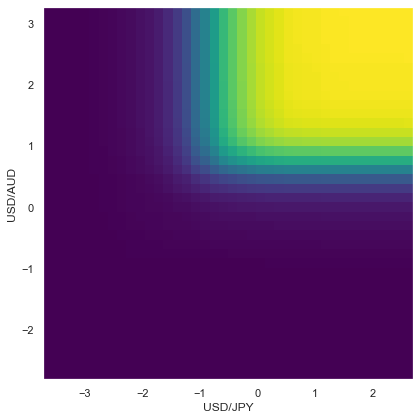

In [97]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
hist_vals, xbins, ybins, mesh = plt.hist2d(hao1, mate1, bins=40, density=True, cmap=plt.cm.viridis)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("hist1.png")
plt.show() ##dystrybuanta
plt.figure(figsize=(6,6))
plt.pcolormesh(xbins, ybins, hist_vals.cumsum(axis=0).cumsum(axis=1), cmap=plt.cm.viridis)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("dystr1.png")
plt.show() ##dystrybuanta
plt.show()

In [76]:
xi

array([[-3.72495141, -3.72495141, -3.72495141, ..., -3.72495141,
        -3.72495141, -3.72495141],
       [-3.70344699, -3.70344699, -3.70344699, ..., -3.70344699,
        -3.70344699, -3.70344699],
       [-3.68194256, -3.68194256, -3.68194256, ..., -3.68194256,
        -3.68194256, -3.68194256],
       ...,
       [ 2.66186285,  2.66186285,  2.66186285, ...,  2.66186285,
         2.66186285,  2.66186285],
       [ 2.68336727,  2.68336727,  2.68336727, ...,  2.68336727,
         2.68336727,  2.68336727],
       [ 2.7048717 ,  2.7048717 ,  2.7048717 , ...,  2.7048717 ,
         2.7048717 ,  2.7048717 ]])

In [77]:
xi.flatten()

array([-3.72495141, -3.72495141, -3.72495141, ...,  2.7048717 ,
        2.7048717 ,  2.7048717 ])

<ipython-input-96-05f090bac852>:11: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])


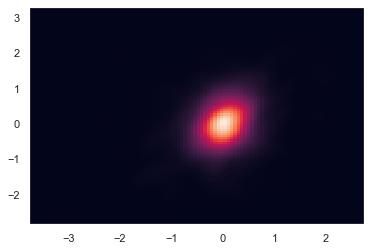

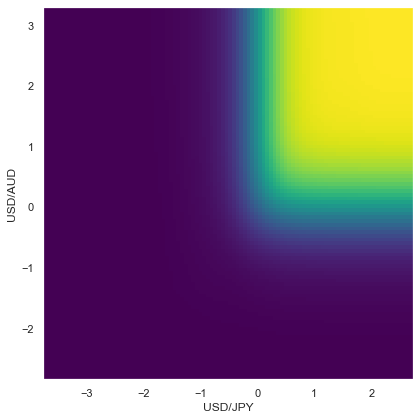

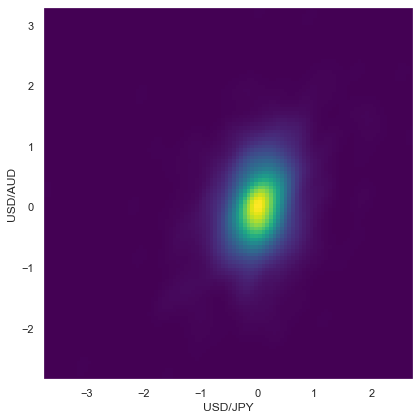

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
 
# create data
x = hao1
y = mate1
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=100
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot - hist
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
plt.show()
plt.figure(figsize=(6,6))
z = zi.reshape(xi.shape) ##z pojedynczego arraya bierze kształt [[..],[..],..]
plt.pcolormesh(xi, yi, z.cumsum(axis=0).cumsum(axis=1), shading='auto', cmap=plt.cm.viridis)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("dystr.png")
plt.show() ##dystrybuanta
 
# Change color palette
plt.figure(figsize=(6,6))
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("hist.png")


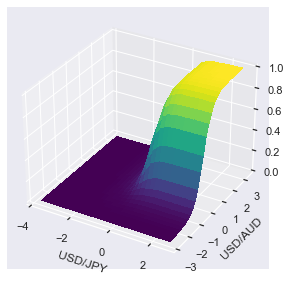

In [88]:
zs = hist_vals.cumsum(axis=0).cumsum(axis=1)/hist_vals.cumsum(axis=0).cumsum(axis=1)[-1,-1]
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xi, yi, zs, cmap=cm.viridis,
                       linewidth=0, antialiased=False)
plt.xlabel("USD/JPY")
plt.ylabel("USD/AUD")
plt.tight_layout()
plt.savefig("3d.png", transparent=True)

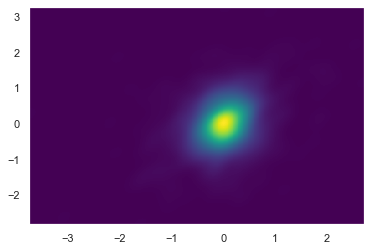

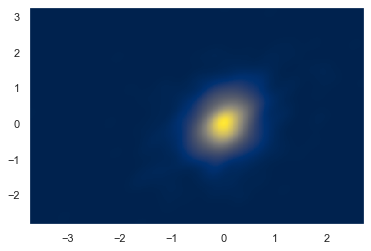

In [250]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.viridis)
plt.show()
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto', cmap=plt.cm.cividis)
plt.show()

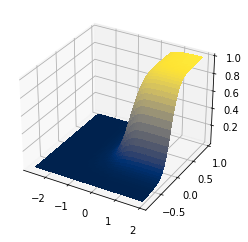

In [224]:
zs = z.cumsum(axis=0).cumsum(axis=1)/z.cumsum(axis=0).cumsum(axis=1)[-1,-1]
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xi, yi, zs, cmap=cm.cividis,
                       linewidth=0, antialiased=False)

In [30]:
X = np.linspace(min(xbins), max(xbins), 30)
Y = np.linspace(min(ybins), max(ybins), 30)
X, Y = np.meshgrid(X, Y)
Z = hist_vals.cumsum(axis=0).cumsum(axis=1)

# ROZKŁADY GRANICZE

In [333]:
from scipy.stats import genextreme as gev
from scipy.stats import kstest
from statsmodels.distributions.empirical_distribution import ECDF

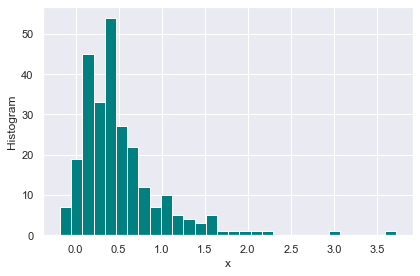

In [334]:
def find_minimum(data, interval_length):
    n_intervals = int(np.floor(len(data)/interval_length))
    minimum = [np.max(data[interval_length*i:interval_length*(i+1)]) for i in range(n_intervals)]
    return(minimum)

mins_hao_diff = find_minimum(-hao1, 5)
plt.hist(mins_hao_diff, bins=30, color="teal" )
plt.xlabel("x")
plt.ylabel("Histogram")
plt.tight_layout()
plt.savefig("maxjpyw.png")

In [335]:


max(mins_hao_diff)

3.7249514115460847

In [336]:
M = mins_hao_diff

In [337]:
xi, mu, sigma = gev.fit(M)

stat, pv = kstest(M, gev.cdf, args=(xi, mu, sigma))
print(stat)
print(pv)

0.04994952703357597
0.5191088079292394


In [338]:
print(-xi, mu, sigma)

0.14628788027262518 0.29092191698461334 0.29052591520776916


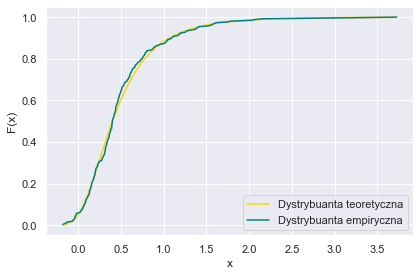

In [339]:
sorted_M = np.sort(M)
plt.plot(sorted_M, np.exp(-(1-xi * (sorted_M - mu) / sigma) ** (1/xi)), color="gold",  label = "Dystrybuanta teoretyczna")
plt.plot(sorted_M, ECDF(M)(sorted_M), color="teal",  label = "Dystrybuanta empiryczna")
plt.legend()
plt.xlabel("x")
plt.ylabel("F(x)")
plt.tight_layout()
plt.savefig("maxjpyds.png")

\'e

In [340]:
def find_x_axis(shape,loc,scale,mins):
    lim = loc - scale / shape
    if shape > 0:
        x = np.linspace(lim, max(mins), num = 100)
    elif shape == 0:
        x = np.linspace(min(mins), max(mins))
    else:
        x = np.linspace(min(mins), loc)
    return(x)
def draw_gev(shape,loc,scale,mins):
    x_axis = np.linspace(min(mins), max(mins))
    y_axis = gev.pdf(x_axis, shape, loc, scale)
    plt.plot( x_axis, y_axis, color="gold")
def gev_distribution(mins):
    shape, loc, scale = gev.fit(mins)
    draw_gev(shape,loc,scale, mins)

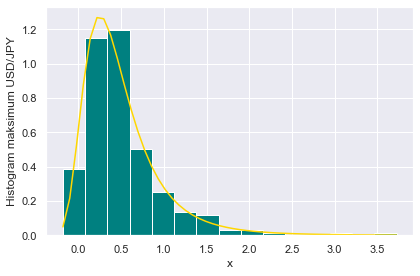

In [341]:
gev_distribution(M)
plt.hist(M, bins = 15, density=True, color="teal")
plt.xlabel("x")
plt.ylabel("Histogram maksimum USD/JPY")
plt.tight_layout()
plt.savefig("maxjpyh.png")

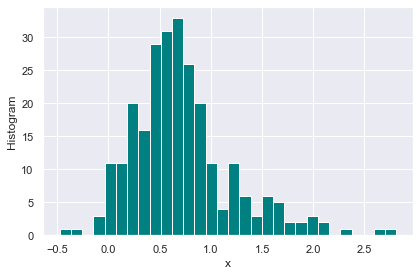

In [342]:
mins_mate_diff = find_minimum(-mate1, 5)
plt.hist(mins_mate_diff, bins=30, color="teal" )
plt.xlabel("x")
plt.ylabel("Histogram")
plt.tight_layout()
plt.savefig("maxaudw.png")

In [343]:
M = mins_mate_diff

In [344]:
xi, mu, sigma = gev.fit(M)

stat, pv = kstest(M, gev.cdf, args=(xi, mu, sigma))
print(stat)
print(pv)

0.06008354967976259
0.29311619985406323


In [345]:
print(-xi, mu, sigma)

-0.04210483978354143 0.5008179875965839 0.4044827701797918


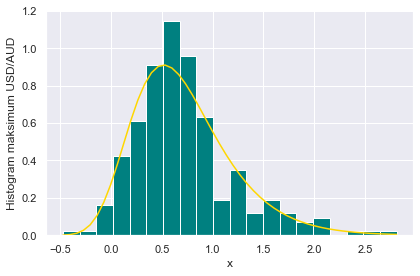

In [346]:
gev_distribution(M)
plt.hist(M, bins = 20, density=True, color="teal")
plt.xlabel("x")
plt.ylabel("Histogram maksimum USD/AUD")
plt.tight_layout()
plt.savefig("maxaudh.png")

In [347]:
1/sigma

2.472293194480205

0.4044827701797918 0.5008179875965839 -0.04210483978354143


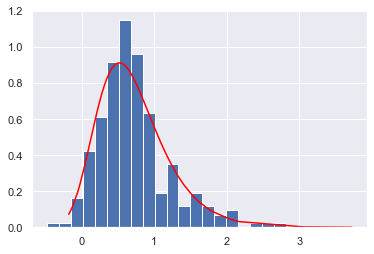

In [348]:
def dens(x_axis, sigma, mu, ksi):
    y = [np.exp(-(1 - ksi * ((x-mu)/sigma)) ** (1 / ksi))*(1 - ksi * ((x-mu)/sigma)) ** (1 / ksi - 1) for x in x_axis]
    return y
print(sigma, mu, -xi)
pddf = dens(sorted_M, sigma, mu, xi)
plt.plot(sorted_M, np.exp(-(1-xi * (sorted_M - mu) / sigma) ** (1/xi))*(1-xi * (sorted_M - mu) / sigma) ** (1/xi - 1)/sigma, color="red")
plt.hist(M, density=True, bins=20)
plt.show()

$\sigma$

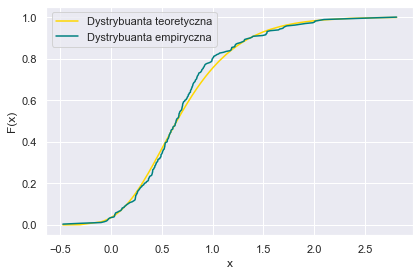

In [349]:
sorted_M = np.sort(M)
plt.plot(sorted_M, np.exp(-(1-xi * (sorted_M - mu) / sigma) ** (1/xi)), color="gold", label = "Dystrybuanta teoretyczna")
plt.plot(sorted_M, ECDF(M)(sorted_M), color="teal",  label = "Dystrybuanta empiryczna")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.tight_layout()
plt.savefig("maxaudd.png")